## Exploratory Data Analysis

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.]

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each movie:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words
3. **Amount of profanity** - most common terms

# 1. Most Common words

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('pickles/docTermMatrix.pkl')
data = data.transpose()
data[50:80]

,AnaA,SophiaL,LindseyM,JeriR,TeresaP
abilities,0,0,0,0,5
abilities changing,0,0,0,0,1
abilities connection,0,0,0,0,1
abilities known,0,0,0,0,1
abilities range,0,0,0,0,1
abilities strengths,0,0,0,0,1
ability,1,3,1,4,3
ability change,0,1,0,0,0
ability communicate,0,0,0,1,0
ability destroy,0,0,0,0,1


In [2]:
# Encuentra las N palabras principales que se dicen en cada crítica de la película, por actor
N =50
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(N)
    top_dict[c]= list(zip(top.index, top.values))

print(top_dict['AnaA'][:10])
print(top_dict['SophiaL'][:10])

[('film', 190), ('movie', 132), ('good', 81), ('did', 79), ('story', 72), ('just', 67), ('like', 53), ('really', 49), ('great', 45), ('music', 43)]
[('movie', 190), ('just', 127), ('film', 121), ('like', 107), ('story', 78), ('did', 63), ('really', 61), ('series', 58), ('horror', 58), ('good', 54)]


In [3]:
# Imprimir las 25 palabras principales que se dicen para cada crítica de cine para cada actor
for actor, top_words in top_dict.items():
    print(actor)
    print(', '.join([word for word, count in top_words[0:25]]))
    print('---')

AnaA
film, movie, good, did, story, just, like, really, great, music, beatles, time, acting, watch, does, plot, films, character, mystery, think, cast, make, murder, bad, people
---
SophiaL
movie, just, film, like, story, did, really, series, horror, good, great, kids, time, pennywise, scene, cgi, book, scary, characters, camille, way, does, acting, feel, character
---
LindseyM
like, just, characters, love, watch, really, great, season, watching, people, hospital, good, time, episode, think, funny, story, character, series, general, friends, general hospital, writers, say, shows
---
JeriR
series, season, star, trek, star trek, like, just, voyager, characters, watch, episode, good, episodes, time, great, really, character, shows, new, watching, make, better, story, cast, love
---
TeresaP
movie, film, just, like, story, good, does, characters, action, really, point, war, time, did, horror, original, make, scenes, doss, break, number, character, great, point break, love
---


In [4]:
data.columns

Index(['AnaA', 'SophiaL', 'LindseyM', 'JeriR', 'TeresaP'], dtype='object')

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.


In [5]:

# Teniendo las 25 palabras principales que se dicen en cada review de la película, por actor
words = []
for palabra in data.columns:
    top = [word for (word, count) in top_dict[palabra]]
    for t in top:
        words.append(t)
        

In [6]:
# Analizamos las palabras principales más comunes presentes en los reviewws para los 5 actores
from collections import Counter
# Agregamos esta lista e identificamos las palabras más comunes junto con cuántas veces aparecen para cada reivew de película
Counter(words).most_common()

[('good', 5),
 ('did', 5),
 ('story', 5),
 ('just', 5),
 ('like', 5),
 ('really', 5),
 ('great', 5),
 ('time', 5),
 ('watch', 5),
 ('does', 5),
 ('character', 5),
 ('make', 5),
 ('people', 5),
 ('characters', 5),
 ('love', 5),
 ('better', 5),
 ('way', 5),
 ('think', 4),
 ('series', 4),
 ('film', 3),
 ('movie', 3),
 ('plot', 3),
 ('cast', 3),
 ('bad', 3),
 ('little', 3),
 ('lot', 3),
 ('best', 3),
 ('episode', 3),
 ('going', 3),
 ('season', 3),
 ('episodes', 3),
 ('watching', 3),
 ('acting', 2),
 ('films', 2),
 ('end', 2),
 ('things', 2),
 ('pretty', 2),
 ('know', 2),
 ('feel', 2),
 ('say', 2),
 ('horror', 2),
 ('scene', 2),
 ('book', 2),
 ('scenes', 2),
 ('original', 2),
 ('real', 2),
 ('writers', 2),
 ('shows', 2),
 ('writing', 2),
 ('years', 2),
 ('new', 2),
 ('tv', 2),
 ('music', 1),
 ('beatles', 1),
 ('mystery', 1),
 ('murder', 1),
 ('quite', 1),
 ('blade runner', 1),
 ('runner', 1),
 ('blade', 1),
 ('world', 1),
 ('jack', 1),
 ('bit', 1),
 ('hollywood', 1),
 ('entertaining', 1),
 

In [7]:

add_stop_words = [word for word, count in Counter(words).most_common() if count >= 3]
add_stop_words

['good',
 'did',
 'story',
 'just',
 'like',
 'really',
 'great',
 'time',
 'watch',
 'does',
 'character',
 'make',
 'people',
 'characters',
 'love',
 'better',
 'way',
 'think',
 'series',
 'film',
 'movie',
 'plot',
 'cast',
 'bad',
 'little',
 'lot',
 'best',
 'episode',
 'going',
 'season',
 'episodes',
 'watching']

## Let's update our document-term matrix with the new list of stop words

In [8]:

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('pickles/data_clean.pkl')

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreamos la matrix de Documentos de Textos
cv = CountVectorizer(stop_words=stop_words, ngram_range=(1, 2))
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index


In [9]:
data_stop

,ab,ab school,aback,aback things,abandoned,abandoned fatherluke,abandoned incoherent,abandoned later,abandoned says,abandonedcreepy,...,zone melodrama,zoom,zoom close,zzzz,zzzz sleep,åeople,åeople working,édgar,édgar ramírez,édgar ramírezin
AnaA,1,1,1,1,0,0,0,0,0,1,...,0,0,0,1,1,1,1,0,0,0
SophiaL,0,0,0,0,2,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
LindseyM,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JeriR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TeresaP,0,0,0,0,1,0,0,0,1,0,...,1,1,1,0,0,0,0,3,2,1


In [10]:

# Pickle it for later use
import pickle
pickle.dump(cv, open("pickles/CountVectorizer_v2.pkl", "wb"))
data_stop.to_pickle("pickles/docTermMatrix_v2.pkl")

In [11]:
 data_stop

,ab,ab school,aback,aback things,abandoned,abandoned fatherluke,abandoned incoherent,abandoned later,abandoned says,abandonedcreepy,...,zone melodrama,zoom,zoom close,zzzz,zzzz sleep,åeople,åeople working,édgar,édgar ramírez,édgar ramírezin
AnaA,1,1,1,1,0,0,0,0,0,1,...,0,0,0,1,1,1,1,0,0,0
SophiaL,0,0,0,0,2,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
LindseyM,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JeriR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TeresaP,0,0,0,0,1,0,0,0,1,0,...,1,1,1,0,0,0,0,3,2,1


In [12]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

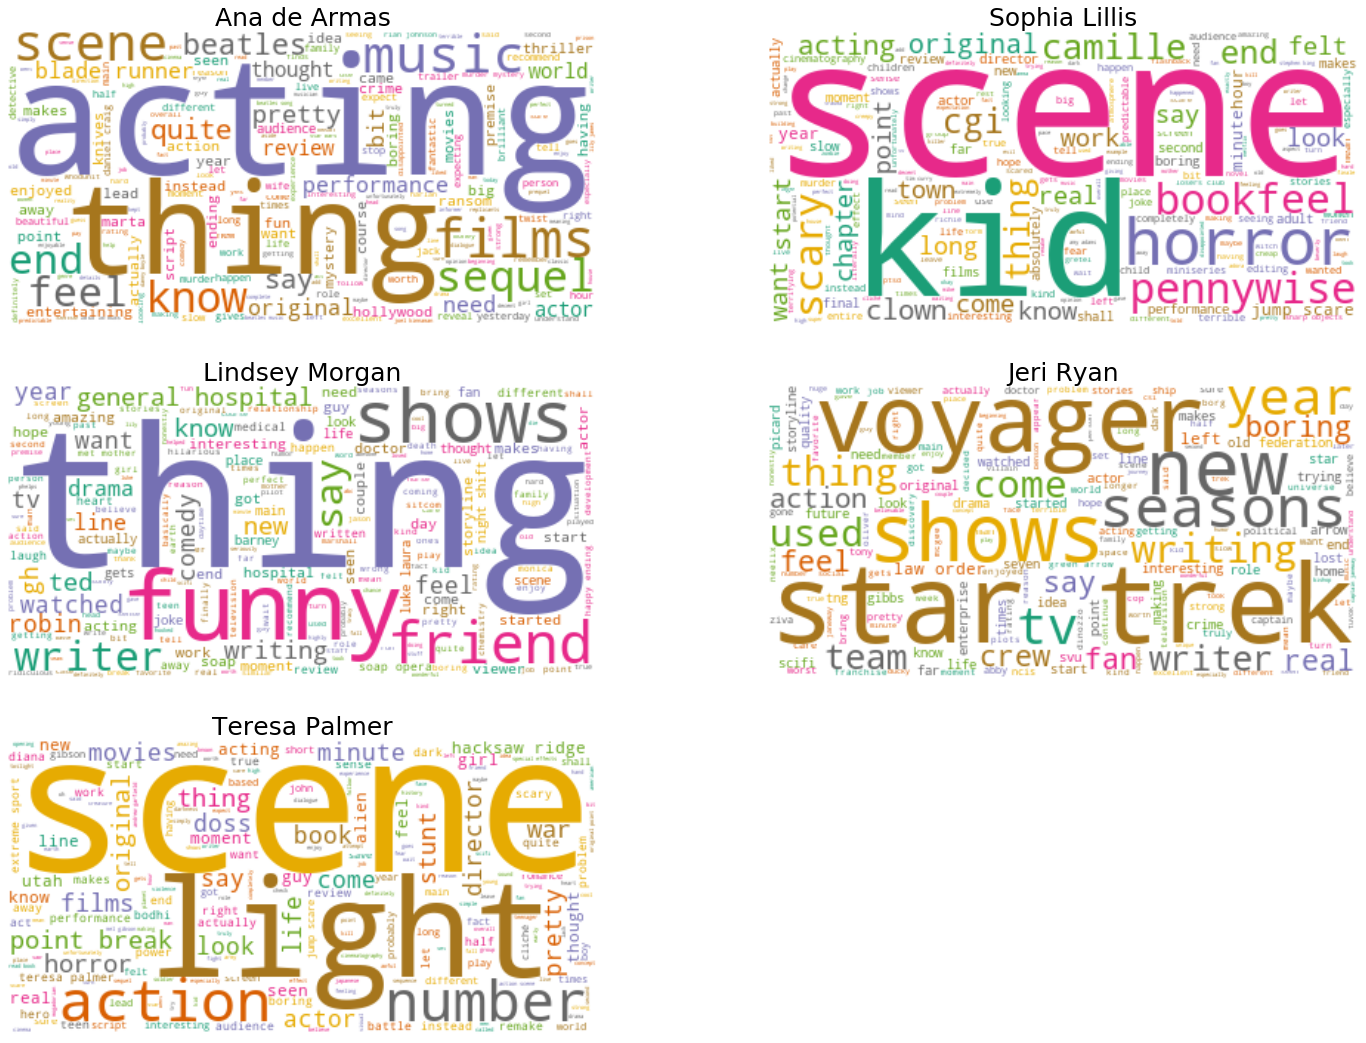

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [25, 25]

actors = ['Ana de Armas', 
          'Sophia Lillis',
          'Lindsey Morgan',
          'Jeri Ryan',
          'Teresa Palmer'
         ]

# Creamos subplots para cada actor
for index, movie in enumerate(data.columns):
    wc.generate(data_clean.transcript[movie])
    
    plt.subplot(4, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(actors[index],fontsize =25)
    
plt.show()

## Number of Words